In [1]:
include("functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [2]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.33, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]

## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-8, solver = :LevenbergMarquardt, max_iter = 10000);

36.1.0e-8.100.LevenbergMarquardt
Branch point 10 of 100, 13 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 3 iterations.
Branch point 60 of 100, 3 iterations.
Branch point 70 of 100, 3 iterations.
Branch point 80 of 100, 8 iterations.
Branch point 90 of 100, 15 iterations.
Branch point 100 of 100, 13 iterations.
 58.519581 seconds (4.18 G allocations: 158.209 GiB, 19.87% gc time, 26.84% compilation time)


In [4]:
# get the file names that start with "fuSimple"
files = readdir("results/")
fuSimple_files = [file for file in files if startswith(file, "fuSimple")]

# load the first file
@load "results/$(fuSimple_files[1])" results_dict

1-element Vector{Symbol}:
 :results_dict

In [5]:
solutions = results_dict["solutions"]

100×38 Matrix{Float64}:
 0.390303  1.0  0.01    3.66335e-5   …   2.24667e-17   5.44387e-17
 0.390303  1.0  0.0132  6.3835e-5       -9.0175e-15    1.42131e-14
 0.390303  1.0  0.0164  9.85475e-5      -1.39382e-14  -1.58289e-14
 0.390304  1.0  0.0196  0.000140775      9.65379e-15   3.60843e-16
 0.390304  1.0  0.0228  0.000190525     -1.26275e-16   1.04156e-16
 0.390305  1.0  0.026   0.000247801  …  -4.51116e-14   1.13057e-14
 0.390305  1.0  0.0292  0.000312614      1.17577e-14  -3.71308e-14
 0.390306  1.0  0.0324  0.000384971      1.26219e-14   1.21635e-15
 0.390307  1.0  0.0356  0.000464883      3.08693e-14  -1.59661e-14
 0.390308  1.0  0.0388  0.00055236      -3.60864e-16   3.53181e-16
 ⋮                                   ⋱                
 0.390903  1.0  0.3012  0.0326648       -1.09982e-5    6.2264e-6
 0.390917  1.0  0.3044  0.0332544        2.17351e-5   -8.95102e-6
 0.390964  1.0  0.3076  0.0333115        9.36558e-6   -6.03148e-6
 0.390966  1.0  0.3108  0.0342752        2.45366e-5   

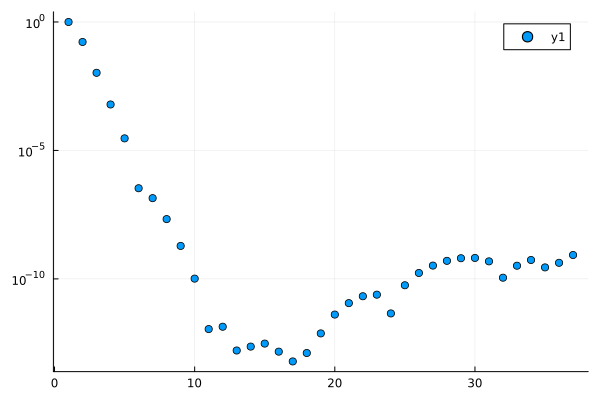

In [6]:
modes = solutions[:,2:end]
scatter(abs.(modes[50,:]), yaxis=:log)

To try 
* more modes / resolution
* zero out modes (more frequently)


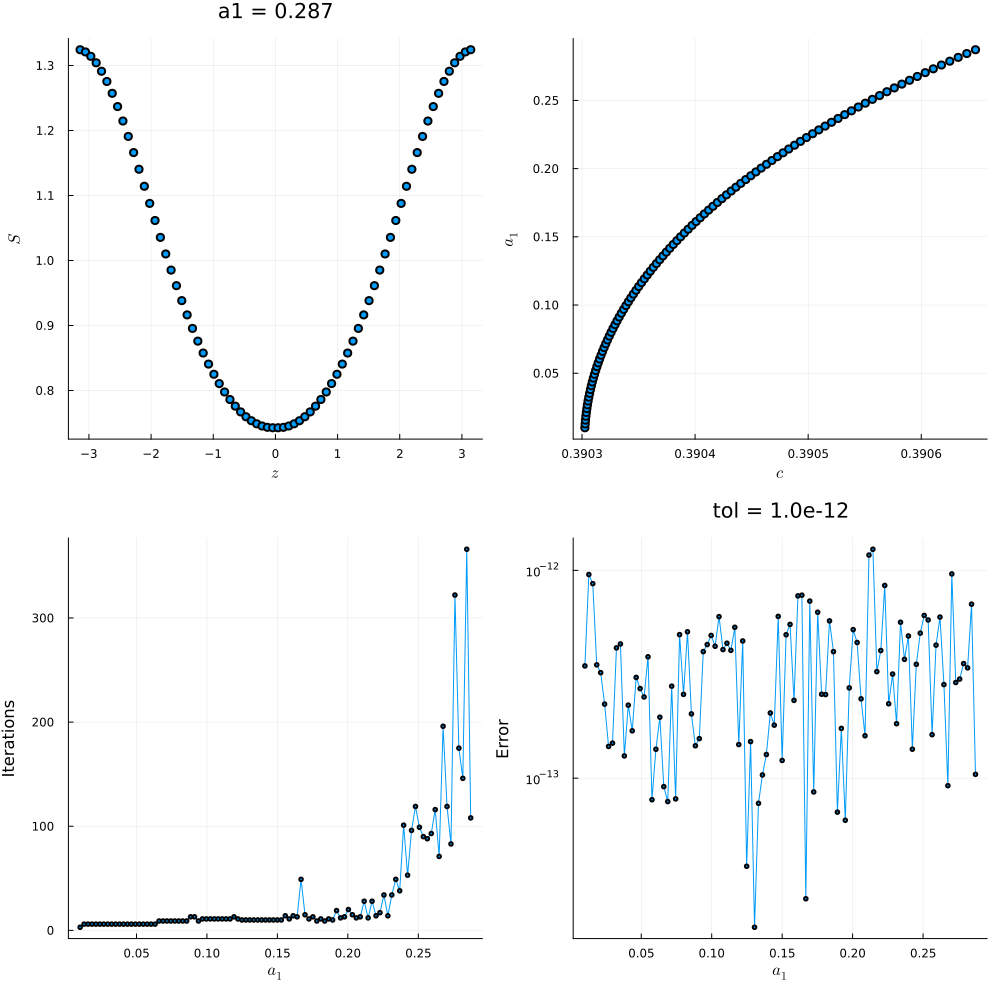

In [33]:
# plotting 
file_name = "36.1.0e-12.100.Broyden"
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting(file_name)
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

# get the constants for this run from the metadata file 


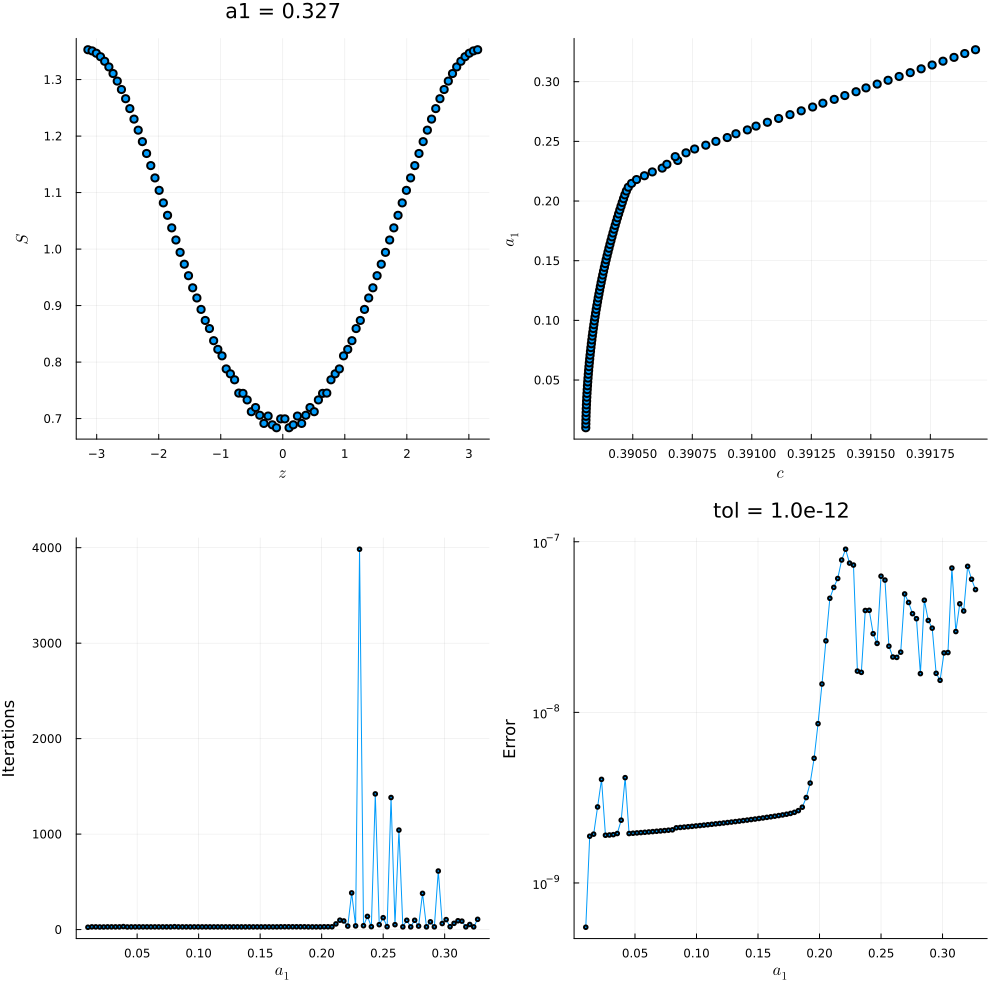

In [34]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-12.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

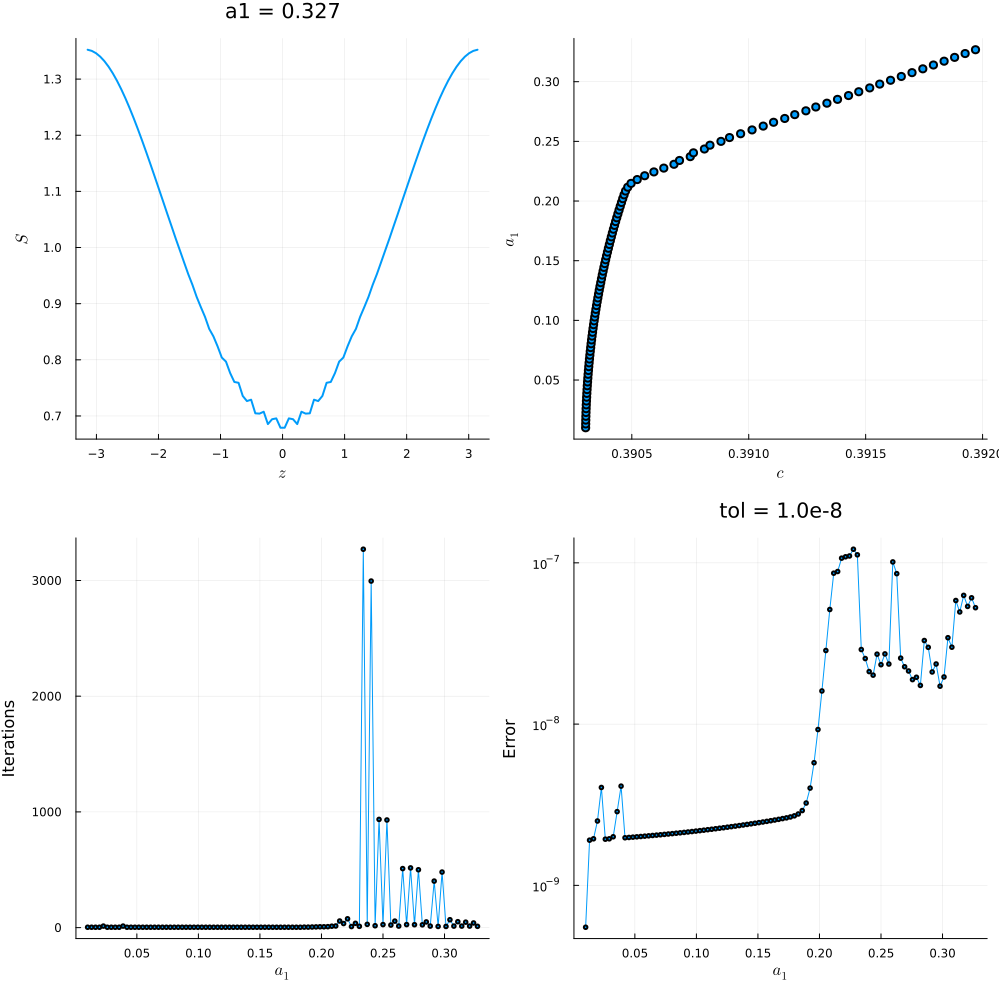

In [2]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-8.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

#### choosing parameters 
* plot $c_0$ vs. parameters (3-4 plots)
* doesn't matter if $c$, $omega$, etc. (look at wikipedia)

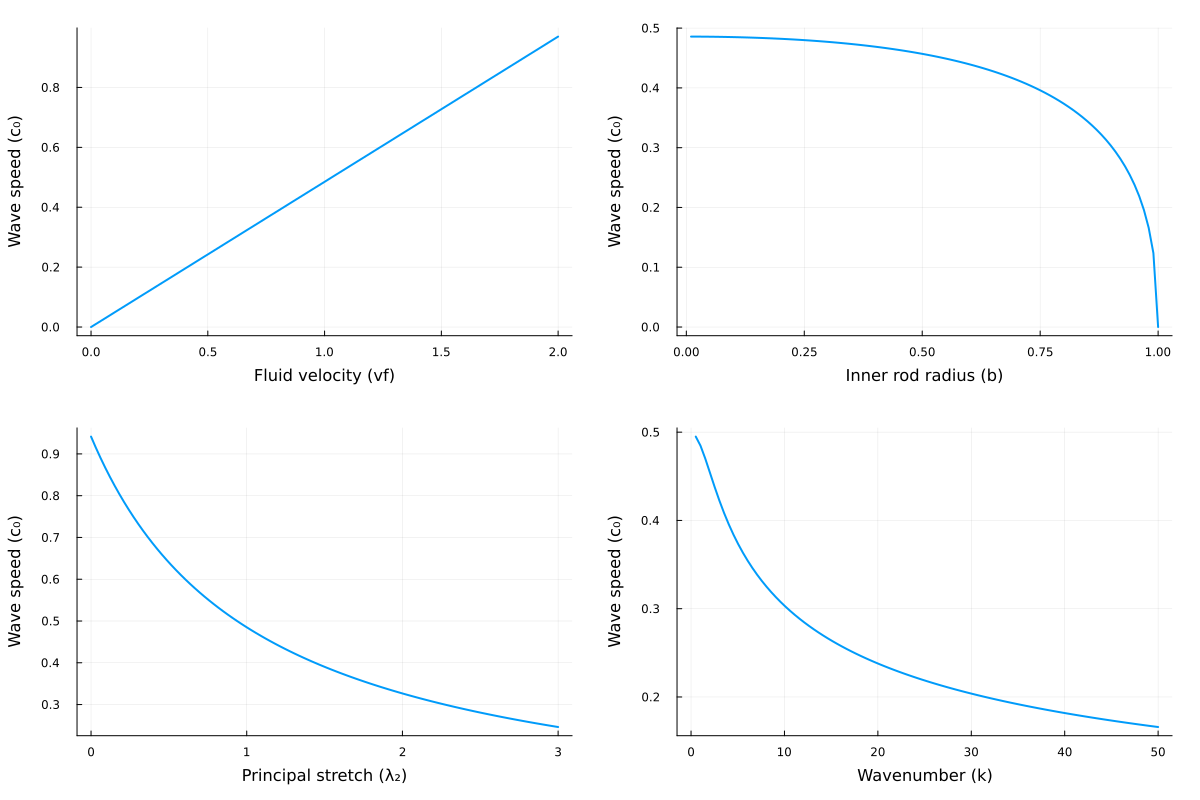

In [2]:
using Plots.PlotMeasures

# Default parameters
N = 36
L = π
k = 1  # Wavenumber
default_b = 0.1
default_λ2 = 1.0
default_vf = 1.0

# Parameter ranges
vf_range = range(0, 2.0, length=100)
b_range = range(0.01, 1.0, length=100)
λ2_range = range(0, 3.0, length=100)

# 1. Varying vf (fluid velocity)
c0_vs_vf = zeros(length(vf_range))
for (i, vf) in enumerate(vf_range)
    constants = fuSimpleConstants(N, L, default_b, default_λ2, vf)
    c0_vs_vf[i] = c0(k, constants)
end

# 2. Varying b (inner rod radius)
c0_vs_b = zeros(length(b_range))
for (i, b) in enumerate(b_range)
    constants = fuSimpleConstants(N, L, b, default_λ2, default_vf)
    c0_vs_b[i] = c0(k, constants)
end

# 3. Varying λ2 (principal stretches)
c0_vs_λ2 = zeros(length(λ2_range))
for (i, λ2) in enumerate(λ2_range)
    constants = fuSimpleConstants(N, L, default_b, λ2, default_vf)
    c0_vs_λ2[i] = c0(k, constants)
end

# Create plots
p1 = plot(vf_range, c0_vs_vf, 
    xlabel="Fluid velocity (vf)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p2 = plot(b_range, c0_vs_b, 
    xlabel="Inner rod radius (b)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p3 = plot(λ2_range, c0_vs_λ2, 
    xlabel="Principal stretch (λ₂)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


# create one more plot where k is varied 
k_range = range(0, 50.0, length=100)
c0_vs_k = zeros(length(k_range))
for (i, k) in enumerate(k_range)
    constants = fuSimpleConstants(N, L, default_b, default_λ2, default_vf)
    c0_vs_k[i] = c0(k, constants)
end

p4 = plot(k_range, c0_vs_k, 
    xlabel="Wavenumber (k)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

# Display plots in a layout
plot(p1, p2, p3, p4, layout=(2,2), size=(1200, 800), margin=20px)

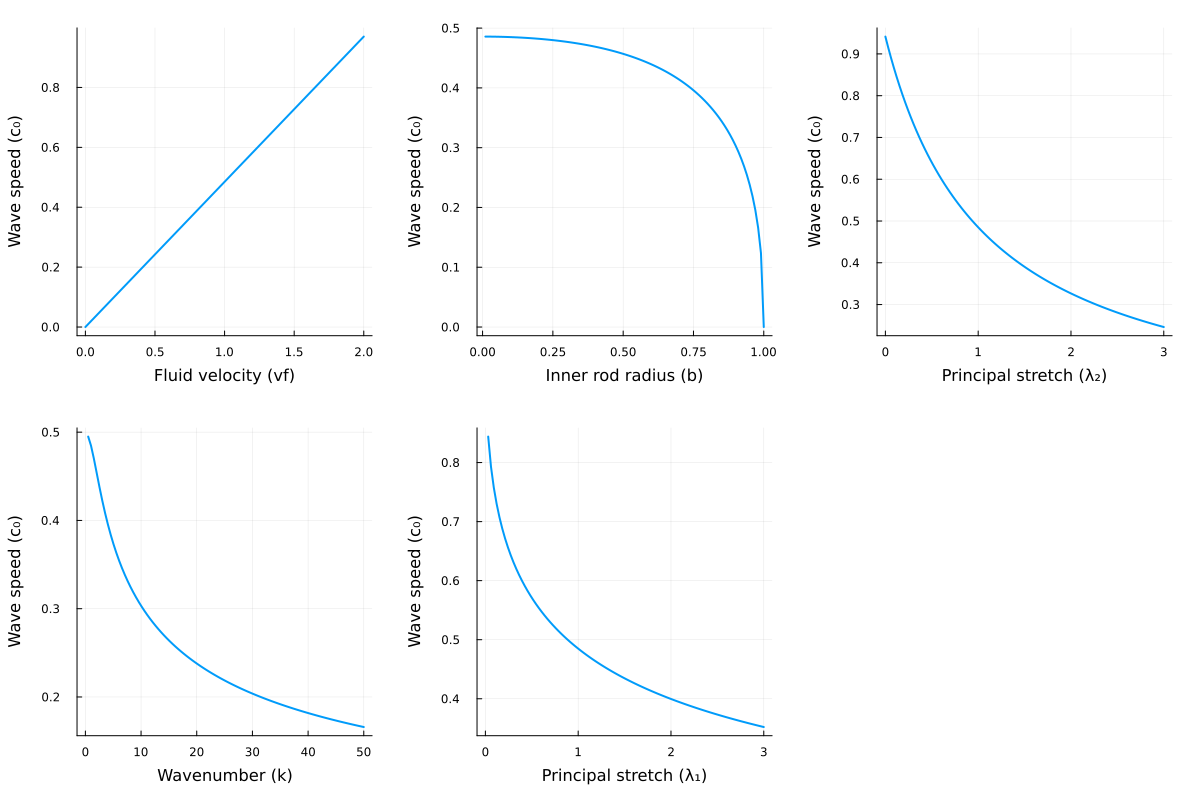

In [5]:
using Plots.PlotMeasures

# Default parameters
N = 36
L = π
k = 1  # Wavenumber
default_b = 0.1
default_λ1 = 1.0
default_λ2 = 1.0
default_vf = 1.0

# Parameter ranges
vf_range = range(0, 2.0, length=100)
b_range = range(0.01, 1.0, length=100)
λ2_range = range(0, 3.0, length=100)

# 1. Varying vf (fluid velocity)
c0_vs_vf = zeros(length(vf_range))
for (i, vf) in enumerate(vf_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, vf)
    c0_vs_vf[i] = c0(k, constants)
end

# 2. Varying b (inner rod radius)
c0_vs_b = zeros(length(b_range))
for (i, b) in enumerate(b_range)
    constants = fuConstants(N, L, b, default_λ1, default_λ2, default_vf)
    c0_vs_b[i] = c0(k, constants)
end

# 3. Varying λ2 (principal stretches)
c0_vs_λ2 = zeros(length(λ2_range))
for (i, λ2) in enumerate(λ2_range)
    constants = fuConstants(N, L, default_b, default_λ1, λ2, default_vf)
    c0_vs_λ2[i] = c0(k, constants)
end

# Create plots
p1 = plot(vf_range, c0_vs_vf, 
    xlabel="Fluid velocity (vf)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p2 = plot(b_range, c0_vs_b, 
    xlabel="Inner rod radius (b)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p3 = plot(λ2_range, c0_vs_λ2, 
    xlabel="Principal stretch (λ₂)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


# create one more plot where k is varied 
k_range = range(0, 50.0, length=100)
c0_vs_k = zeros(length(k_range))
for (i, k) in enumerate(k_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, default_vf)
    c0_vs_k[i] = c0(k, constants)
end

p4 = plot(k_range, c0_vs_k, 
    xlabel="Wavenumber (k)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


λ1_range = range(0, 3.0, length=100)
c0_vs_λ1 = zeros(length(λ1_range))
for (i, λ1) in enumerate(λ1_range)
    constants = fuConstants(N, L, default_b, λ1, default_λ2, default_vf)
    c0_vs_λ1[i] = c0(k, constants)
end

p5 = plot(λ1_range, c0_vs_λ1, 
    xlabel="Principal stretch (λ₁)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

# Display plots in a layout
plot(p1, p2, p3, p4, p5, layout=(2,3), size=(1200, 800), margin=20px)